# Tidy Data Project: Federal R&D Budget

## Introduction

## Data Cleaning & Tidy Process

### 1. Initializing a DataFrame from the dataset

For this step, we import all necessary libraries and initialize a DataFrame (df_fed) from our given .csv file (fed_rd_year&gdp.csv) using pandas. We can then display df_fed to check for areas of needed tidying.

*Note: When I originally create the DataFrame, some values display in scientific notation by default. I've used pd.set_option to ensure that all floats are in standard notation with commas.*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# LOADING AND INITIALIZING THE ORIGINAL DATASET AS A PANDAS DATAFRAME
# -------------------------------------------------------------------

df_fed = pd.read_csv("data/fed_rd_year&gdp.csv")

print("Untidy (Original) Dataset:")
display(df_fed) 

# Values were displayed in scientific notation; this fixes that
pd.set_option('display.float_format', '{:,.0f}'.format)


''' 
Note: I've opted to use display() instead of
print() when showing df_fed because of its
capabilities in Jupyter to show the data in a
clearer, more visually appealing table. For my
data viewing purposes, I had no issues using 
display() over print().
'''

Untidy (Original) Dataset:


,department,1976_gdp1790000000000.0,1977_gdp2028000000000.0,1978_gdp2278000000000.0,1979_gdp2570000000000.0,1980_gdp2797000000000.0,1981_gdp3138000000000.0,1982_gdp3314000000000.0,1983_gdp3541000000000.0,1984_gdp3953000000000.0,1985_gdp4270000000000.0,1986_gdp4536000000000.0,1987_gdp4782000000000.0,1988_gdp5155000000000.0,1989_gdp5570000000000.0,1990_gdp5915000000000.0,1991_gdp6110000000000.0,1992_gdp6435000000000.0,1993_gdp6795000000000.0,1994_gdp7198000000000.0,1995_gdp7583000000000.0,1996_gdp7978000000000.0,1997_gdp8483000000000.0,1998_gdp8955000000000.0,1999_gdp9511000000000.0,2000_gdp10148000000000.0,2001_gdp10565000000000.0,2002_gdp10877000000000.0,2003_gdp11332000000000.0,2004_gdp12089000000000.0,2005_gdp12889000000000.0,2006_gdp13685000000000.0,2007_gdp14323000000000.0,2008_gdp14752000000000.0,2009_gdp14415000000000.0,2010_gdp14799000000000.0,2011_gdp15379000000000.0,2012_gdp16027000000000.0,2013_gdp16516000000000.0,2014_gdp17244000000000.0,2015_gdp17983000000000.0,2016_gdp18470000000000.0,2017_gdp19177000000000.0
0,DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360000000,979000000,1333000000,1559000000,1583000000,1181000000,1155000000,1258000000,1009000000,848000000,527000000,737000000,1092000000,960000000,602000000,735000000
1,DOC,"819,000,000","837,000,000","871,000,000","952,000,000","945,000,000","829,000,000","693,000,000","700,000,000","755,000,000","789,000,000","778,000,000","804,000,000","764,000,000","766,000,000","784,000,000","898,000,000","952,000,000","1,265,000,000","1,595,000,000","1,709,000,000","1,488,000,000","1,421,000,000","1,589,000,000","1,559,000,000","1,654,000,000","1,417,000,000",1661000000,1591000000,1452000000,1410000000,1293000000,1271000000,1379000000,1594000000,1521000000,1357000000,1373000000,1397000000,1641000000,1596000000,1730000000,1824000000
2,DOD,"35,696,000,000","37,967,000,000","37,022,000,000","37,174,000,000","37,005,000,000","41,737,000,000","46,893,000,000","51,008,000,000","58,139,000,000","64,416,000,000","68,931,000,000","71,541,000,000","71,145,000,000","69,231,000,000","65,589,000,000","62,238,000,000","61,682,000,000","61,956,000,000","55,423,000,000","54,026,000,000","53,688,000,000","54,903,000,000","54,716,000,000","55,927,000,000","56,297,000,000","58,807,000,000",67534000000,78782000000,85503000000,88331000000,90443000000,93645000000,94247000000,93527000000,94325000000,88220000000,81543000000,70583000000,70341000000,69522000000,75213000000,51862000000
3,DOE,"10,882,000,000","13,741,000,000","15,663,000,000","15,612,000,000","15,226,000,000","14,798,000,000","12,160,000,000","11,129,000,000","11,731,000,000","12,043,000,000","10,911,000,000","10,446,000,000","10,863,000,000","11,225,000,000","12,103,000,000","12,275,000,000","13,280,000,000","11,872,000,000","10,568,000,000","9,806,000,000","9,412,000,000","9,167,000,000","9,250,000,000","10,019,000,000","9,800,000,000","10,640,000,000",10938000000,11232000000,11296000000,10835000000,10451000000,10709000000,11343000000,11823000000,12329000000,11902000000,11839000000,11528000000,12686000000,15033000000,15504000000,15032000000
4,DOT,"1,142,000,000","1,095,000,000","1,156,000,000","1,004,000,000","1,048,000,000","978,000,000","702,000,000","800,000,000","1,018,000,000","885,000,000","746,000,000","595,000,000","587,000,000","586,000,000","613,000,000","688,000,000","1,014,000,000","990,000,000","1,000,000,000","1,018,000,000","902,000,000","902,000,000","859,000,000","873,000,000","855,000,000","989,000,000",1053000000,929000000,862000000,888000000,995000000,909000000,1016000000,1062000000,1221000000,1064000000,1007000000,881000000,843000000,926000000,910000000,936000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,NIH,"8,025,000,000","8,214,000,000","8,802,000,000","9,243,000,000","9,093,000,000","8,580,000,000","8,314,000,00

" \nNote: I've opted to use display() instead of\nprint() when showing df_fed because of its\ncapabilities in Jupyter to show the data in a\nclearer, more visually appealing table. For my\ndata viewing purposes, I had no issues using \ndisplay() over print().\n"

**Observations**

The original dataset appears to have a number of issues. For instance:
1. Column headers contain values (i.e. "1976" and "1790000000000.0") instead of variables (i.e. "year" and "total GDP").
2. Multiple variables are stored together ("1976" and "1790000000000.0" are together as "1976_gdp1790000000000.0", etc.). *This becomes especially apparent later on, when we melt the dataframe.*
3. Some cells are missing values (DHS has NaN values from 1976-2001)

Let's address each of these issues by using pd.melt(), str.split(), and DataFrame.fillna(), respectively.


### 2. Melting the Dataframe using pd.melt()

By melting the dataframe, we can move values out of the column headers and into cells where they belong. I've used pd.melt() to move the original column headers under a new column called "yr_total_gdp," which includes values for both the fiscal year and the total GDP. 

*Since this new column contains two values per cell, we should use str.split() to tidy our data next.*

In [275]:
# ---------------------
# MELTING THE DATAFRAME
# ---------------------

# Creating a list of columns I'll want to use as my value_vars for pd.melt()
gdp_yrs = df_fed.columns.tolist()
gdp_yrs.remove('department')

# Melting the DataFrame
df_fed = pd.melt(df_fed,
                 id_vars=['department'],
                 value_vars=gdp_yrs,
                 var_name='yr_total_gdp', value_name='rd_budget')

# Displaying the melted DataFrame
display(df_fed)


,department,yr_total_gdp,rd_budget
0,DHS,1976_gdp1790000000000.0,NaN
1,DOC,1976_gdp1790000000000.0,"819,000,000"
2,DOD,1976_gdp1790000000000.0,"35,696,000,000"
3,DOE,1976_gdp1790000000000.0,"10,882,000,000"
4,DOT,1976_gdp1790000000000.0,"1,142,000,000"
...,...,...,...
583,NIH,2017_gdp19177000000000.0,"33,052,000,000"
584,NSF,2017_gdp19177000000000.0,"6,040,000,000"
585,Other,2017_gdp19177000000000.0,"1,553,000,000"
586,USDA,2017_gdp19177000000000.0,"2,625,000,000"


### 3. Separating Year and Total GDP using str.split()

To further tidy the data, I've split yr_total_gdp into separate columns (year and total_gdp) along the '_'. I've also dropped the original yr_total_gdp column because we no longer need it once we've performed the split.

Additionally, this leaves us with values in the total_gdp column that contain a variable name 'gdp' in front of each value number. Since the variable name belongs in the column header (total_gdp) and not in each cell, I've removed that using str.replace() and converted the remaining values to numeric values (which could help us in the future for our analysis)

In [276]:
# --------------------------
# SPLITTING YEAR & TOTAL GDP
# --------------------------

# Performing the split and dropping the original, unsplit column
df_fed[['year', 'total_gdp']] = df_fed['yr_total_gdp'].str.split('_', expand=True)
df_fed.drop(columns=['yr_total_gdp'], inplace=True)

# Removing 'gdp' from total_gdp column while keeping the numerical GDP value
df_fed['total_gdp'] = df_fed['total_gdp'].str.replace('gdp', '', regex=True)

# Convert total_gdp to numeric values (float)
df_fed['total_gdp'] = pd.to_numeric(df_fed['total_gdp'], errors='coerce')

'''
Warning: Running this code block more 
than once may cause errors.
'''

'\nWarning: Running this code block more \nthan once may cause errors.\n'

In [277]:
# Displaying the split dataframe
display(df_fed)

,department,rd_budget,year,total_gdp
0,DHS,NaN,1976,"1,790,000,000,000"
1,DOC,"819,000,000",1976,"1,790,000,000,000"
2,DOD,"35,696,000,000",1976,"1,790,000,000,000"
3,DOE,"10,882,000,000",1976,"1,790,000,000,000"
4,DOT,"1,142,000,000",1976,"1,790,000,000,000"
...,...,...,...,...
583,NIH,"33,052,000,000",2017,"19,177,000,000,000"
584,NSF,"6,040,000,000",2017,"19,177,000,000,000"
585,Other,"1,553,000,000",2017,"19,177,000,000,000"
586,USDA,"2,625,000,000",2017,"19,177,000,000,000"


### 4. Filling Missing Values using DataFrame.fillna()

Once we've melted the DataFrame and split year and total_gdp into separate columns, the dataset looks fairly tidy. However, before we can perform any sort of analysis on it, we need to address the missing values.

**Observations:**
1. All missing values are in the rd_budget column.
2. All missing values are associated with the DHS department.
3. All missing values are for the years 1976-2001.

The data is undeniably MNAR. It makes sense that this data is missing, because the Department of Homeland Security (DHS) was not established until 2002. We can safely infer that nothing was budgeted to DHS from 1976-2001 because the department was not yet in existence. Thus, I've opted to replace all NaN values with 0 using fillna().

In [278]:
# ------------------
# FILLING NaN VALUES
# ------------------

df_fed = df_fed.fillna(0)

'''
Values are missing for DHS from 1976 to 2001.
I confirmed via Internet search that this is because
DHS was established in 2002; thus the US government
budgeted no money to DHS prior to its establishment.
I concluded from this that it is safe to fill missing
values with zeros, as this accurately reflects the
zero US dollars budgeted to DHS from 1976 to 2001.
'''

'\nValues are missing for DHS from 1976 to 2001.\nI confirmed via Internet search that this is because\nDHS was established in 2002; thus the US government\nbudgeted no money to DHS prior to its establishment.\nI concluded from this that it is safe to fill missing\nvalues with zeros, as this accurately reflects the\nzero US dollars budgeted to DHS from 1976 to 2001.\n'

## Results

The resulting DataFrame (seen below) displays a tidied version of the dataset. By default, this code will display only 10 of the 588 total observations in this dataset, but you can examine the full dataset by changing variable full_frame to True. For more details, see the code block below.

In [279]:
# ---------------------
# VIEWING THE DATAFRAME
# ---------------------

full_frame = False 

'''
By changing the above variable, full_frame, from the boolean
value False to True, you may view the entire tidied DataFrame.

The default value of full_frame is False. When set to False,
only the first and last five rows of the DataFrame will display
when you run this code.
'''

if full_frame == True:
    pd.set_option("display.max_rows", None)
else:
    pd.set_option("display.max_rows", 10)

print("Tidied Dataset:")
display(df_fed)
    

Tidied Dataset:


,department,rd_budget,year,total_gdp
0,DHS,0,1976,"1,790,000,000,000"
1,DOC,"819,000,000",1976,"1,790,000,000,000"
2,DOD,"35,696,000,000",1976,"1,790,000,000,000"
3,DOE,"10,882,000,000",1976,"1,790,000,000,000"
4,DOT,"1,142,000,000",1976,"1,790,000,000,000"
...,...,...,...,...
583,NIH,"33,052,000,000",2017,"19,177,000,000,000"
584,NSF,"6,040,000,000",2017,"19,177,000,000,000"
585,Other,"1,553,000,000",2017,"19,177,000,000,000"
586,USDA,"2,625,000,000",2017,"19,177,000,000,000"


**Observations**

Note that, after tidying the dataset, we no longer have any issues with column headers containing values, multiple variables being stored in the same cell, or cells missing values. Instead, each variable (department, rd_budget, year, and total_gdp) forms a column, each observation (1-588) forms a row, and each value goes in its own separate cell. According to tidy data principles, the dataset is now clean and tidy. However, a pivot table can further organize the data for our purposes.

### 5. Creating a Pivot Table

Using the newly tidied DataFrame df_fed, let's create a pivot table (df_fed_pivot). I have opted to use year as my index, the departments as my columns, and the R&D budget as my values. I've excluded total_GDP, firstly because it does not vary from department to department for each year recorded (which makes sense, because total annual GDP would not be different if the years are the same), and secondly because I deemed it unimportant for my purposes. For instance, if I am only interested in seeing how spending has increased or decreased over time for the Department of Defense, I would not necessarily need to know the total GDP (I would only need that if I was interested in comparing spending increases/decreases to increases/decreases in GDP).

In [280]:
df_fed_pivot = df_fed.pivot_table(index=['year'],
                                  columns='department',
                                  values='rd_budget',
                                  aggfunc='mean')

print("Pivot Table from Tidied Dataset - R&D Budget:")
display(df_fed_pivot)

''' 
Note: I removed total_gdp from the pivot table
because it is irrelevant for the ways in which
I've chosen to analyze the data. This pivot 
table provides only a simple view of the data
with which we can display changes in R&D budget.
However, if including total_gdp, I would place it
here as a second index along with year. 
'''


Pivot Table from Tidied Dataset - R&D Budget:


department,DHS,DOC,DOD,DOE,DOT,EPA,HHS,Interior,NASA,NIH,NSF,Other,USDA,VA
year,,,,,,,,,,,,,,
1976,0,"819,000,000","35,696,000,000","10,882,000,000","1,142,000,000","968,000,000","9,226,000,000","1,152,000,000","12,513,000,000","8,025,000,000","2,372,000,000","1,191,000,000","1,837,000,000","404,000,000"
1977,0,"837,000,000","37,967,000,000","13,741,000,000","1,095,000,000","966,000,000","9,507,000,000","1,082,000,000","12,553,000,000","8,214,000,000","2,395,000,000","1,280,000,000","1,796,000,000","374,000,000"
1978,0,"871,000,000","37,022,000,000","15,663,000,000","1,156,000,000","1,175,000,000","10,533,000,000","1,125,000,000","12,516,000,000","8,802,000,000","2,446,000,000","1,237,000,000","1,962,000,000","356,000,000"
1979,0,"952,000,000","37,174,000,000","15,612,000,000","1,004,000,000","1,102,000,000","10,127,000,000","1,176,000,000","13,079,000,000","9,243,000,000","2,404,000,000","2,321,000,000","2,054,000,000","353,000,000"
1980,0,"945,000,000","37,005,000,000","15,226,000,000","1,048,000,000","903,000,000","10,045,000,000","1,082,000,000","13,837,000,000","9,093,000,000","2,407,000,000","2,468,000,000","1,887,000,000","359,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,"737,000,000","1,397,000,000","70,583,000,000","11,528,000,000","881,000,000","570,000,000","32,095,000,000","846,000,000","11,845,000,000","30,522,000,000","5,739,000,000","1,846,000,000","2,279,000,000","1,253,000,000"
2014,"1,092,000,000","1,641,000,000","70,341,000,000","12,686,000,000","843,000,000","569,000,000","32,438,000,000","889,000,000","12,432,000,000","30,938,000,000","6,135,000,000","1,697,000,000","2,517,000,000","1,165,000,000"
2015,"960,000,000","1,596,000,000","69,522,000,000","15,033,000,000","926,000,000","544,000,000","31,537,000,000","903,000,000","11,927,000,000","30,046,000,000","6,260,000,000","1,558,000,000","2,565,000,000","1,231,000,000"


" \nNote: I removed total_gdp from the pivot table\nbecause it is irrelevant for the ways in which\nI've chosen to analyze the data. This pivot \ntable provides only a simple view of the data\nwith which we can display changes in R&D budget.\nHowever, if including total_gdp, I would place it\nhere as a second index along with year. \n"

**Observations**

With this new pivot table, we can easily read the table in two ways:
1. **Horizontally,** so that we can compare spending between departments for each fiscal year, or
2. **Vertically,** so that we can see how spending has changed within a department over time.

This clear display can make data analysis much easier. That's the power of tidy data! However, we may benefit from a data visualization to help us really see what's going on.

## Data Visualizations

### 1. Comparing Departments

For instance, we can convert our pivot table into a basic visual plot using matplotlib.plot(). The visualization will give us a sense of the comparative budgets between departments, plus any major increases or decreases in a department's budget over time, in one simple visualization.

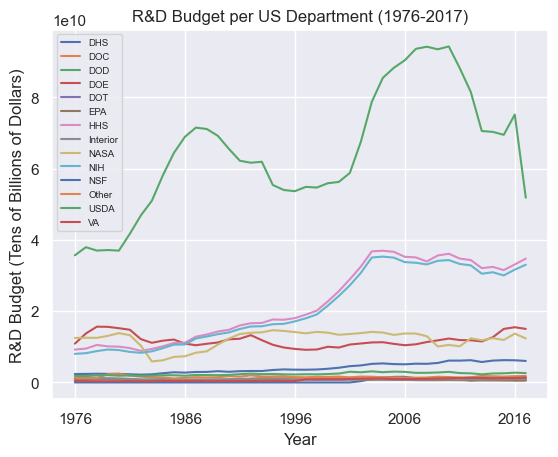

In [281]:
# ------------------------------------------------------
# BASIC SUMMARY PLOT: BUDGET V. YEAR FOR EACH DEPARTMENT
# ------------------------------------------------------

''' 
Quickly view and compare R&D budgets for 
each department over time, using data from
the pivot table.
'''

summary_plot = df_fed_pivot.plot()

summary_plot.set_xlabel("Year")
summary_plot.set_ylabel("R&D Budget (Tens of Billions of Dollars)")
summary_plot.set_title("R&D Budget per US Department (1976-2017)")
summary_plot.legend(fontsize='xx-small')



Visualizations like this one are helpful because they quickly put the data on our pivot table into context. For instance, we can see how much larger the Department of Defense's budget appears on this table, and observe as well that the budgets for the HHS and NIH appear almost identical. Such observations, while possible when looking at a pivot table, appear much more obvious when displayed using a data visualization.

<Axes: xlabel='department', ylabel='year'>

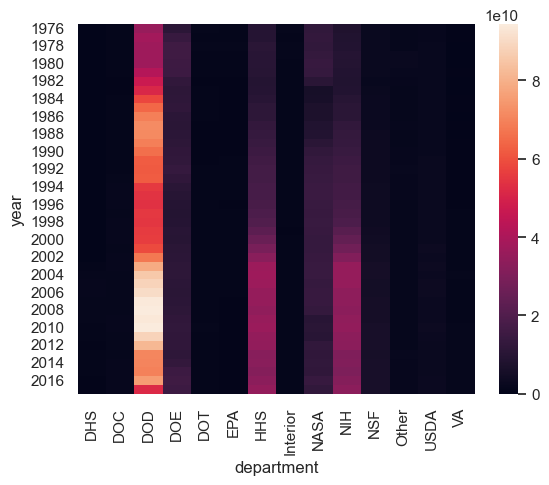

In [282]:
# ----------------------------------------------
# SUMMARY HEATMAP: SEE WHERE THE MOST MONEY GOES
# ----------------------------------------------

''' 
Quickly identify departments with the largest
budgets using a heatmap. 
'''

sns.heatmap(df_fed_pivot)

This alternative way of visualizing the pivot table shows us what would be represented on the previous visualization as a "peak" with an increasingly yellow color. The DOD spending really pops here, with an obvious increase in spending from ~1984-1994 and an especially dramatic one from ~2002-2012. Similarly, it shows a noticeable increase in spending for the HHS and NIH beginning in the 21st century and continuing onward.

### 2. Putting the Budgets in GDP Context

While GDP remained out of the picture for the previous two visualizations, we can bring it back in for this visualization, which shows the R&D budgets as a fraction of GDP spending. For this, I'll take my tidied df_fed and aggregate the spending of each department against the total GDP value.

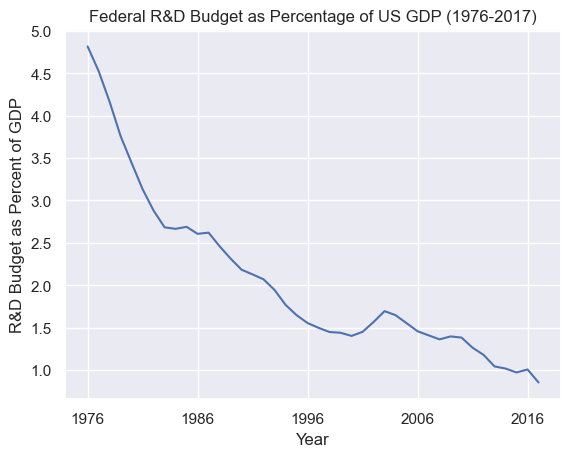

In [283]:
# --------------------------
# SUMMING UP THE R&D BUDGETS
# --------------------------

# Getting the total amount budgeted toward R&D per year
df_budget_sums = df_fed.groupby("year").agg({"rd_budget": "sum", "total_gdp": "mean"}).reset_index()

# Calculating the total budget as a percentage of total GDP
df_budget_sums["rd_of_gdp"] = (df_budget_sums["rd_budget"] / df_budget_sums["total_gdp"]) * 100

plt.plot(df_budget_sums["year"], df_budget_sums["rd_of_gdp"])

plt.xticks(df_budget_sums["year"][::10])  


plt.xlabel("Year")
plt.ylabel("R&D Budget as Percent of GDP")
plt.title("Federal R&D Budget as Percentage of US GDP (1976-2017)")

plt.show()



## Conclusion